<a href="https://colab.research.google.com/github/Appaji-Yadla/Appaji-Yadla/blob/main/Diamond_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Requisite Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython import display

#Loading the data

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science_Innomatics/Data Sets/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 10)

# EDA

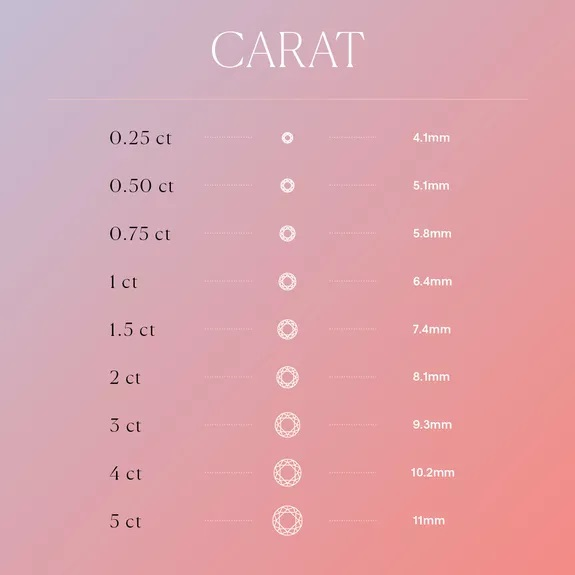

In [ ]:
display.Image("/content/drive/MyDrive/Data Science_Innomatics/Data Sets/carat_.jpg")

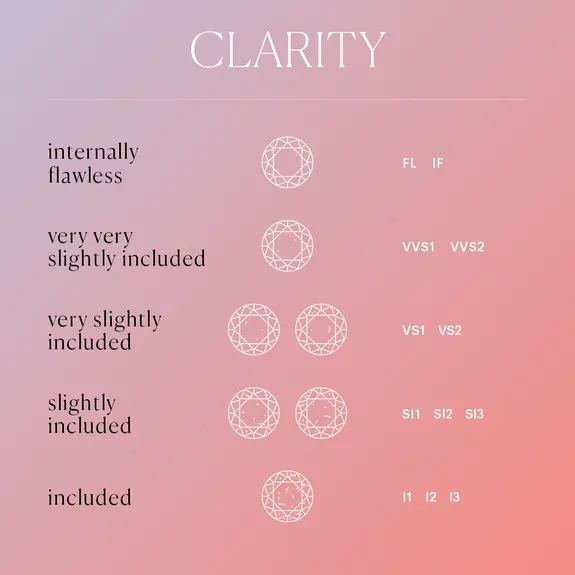

In [ ]:
display.Image("/content/drive/MyDrive/Data Science_Innomatics/Data Sets/clarity_.jpg")

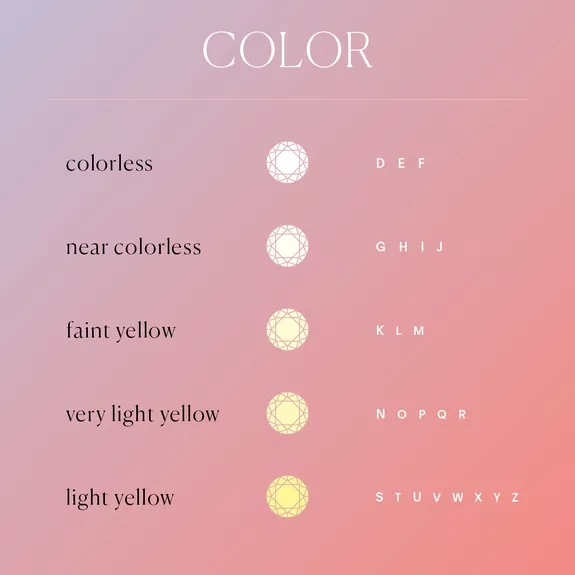

In [ ]:
display.Image("/content/drive/MyDrive/Data Science_Innomatics/Data Sets/color.jpg")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


price: price in US dollars ($ 326 - $ 18,823)

carat: weight of the diamond (0.2 - 5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0 - 10.74)

y: width in mm (0 - 58.9)

z: depth in mm (0 - 31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)

table: width of top of diamond relative to widest point (43 - 95)

In [ ]:
df.rename(columns={"x": "length","y":"width","z": "depth", "depth": "depth_%", "table": "table_%"},inplace=True)
df.head()

,carat,cut,color,clarity,depth_%,table_%,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth_%,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table_%,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
length,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
width,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
depth,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


In [ ]:
#Check for Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth_%    0
table_%    0
price      0
length     0
width      0
depth      0
dtype: int64

In [ ]:
df.describe(include="all")

,carat,cut,color,clarity,depth_%,table_%,price,length,width,depth
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


Figure(2000x600)


<ipython-input-14-657d4a4da37e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=8,center =0,ax=ax,cmap="coolwarm")


<Axes: >

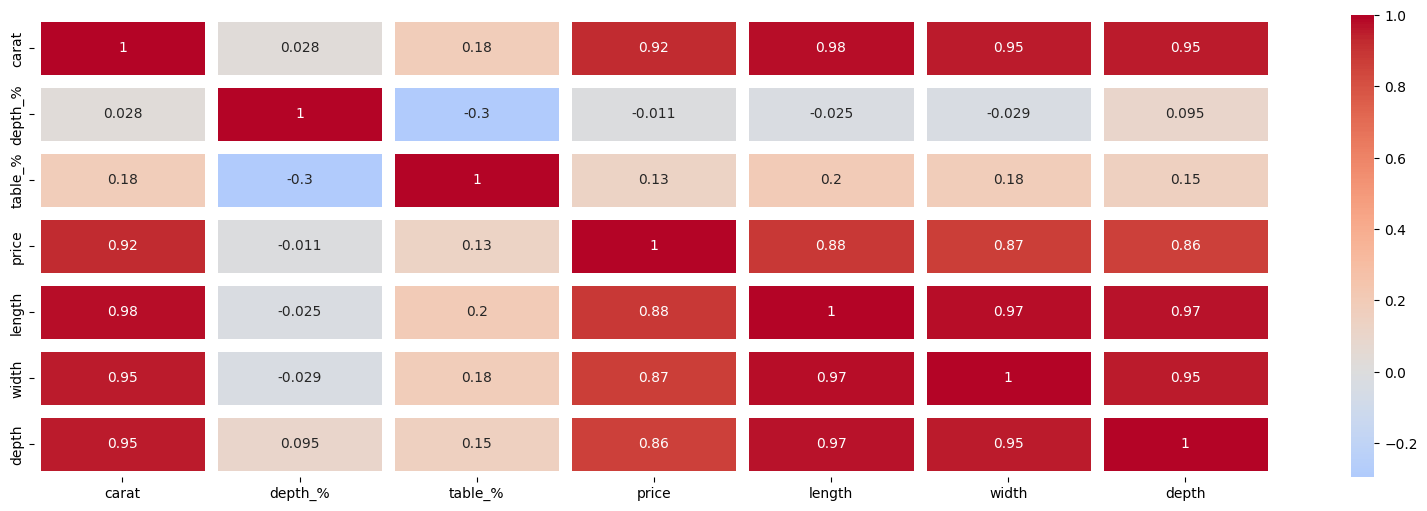

In [ ]:
# Finding correlated features
f , ax = plt.subplots(figsize=(20,6))
print(f)
sns.heatmap(df.corr(),annot=True,linewidths=8,center =0,ax=ax,cmap="coolwarm")

# Data Preprocessing

In [ ]:
print(df["cut"].unique().tolist())
print(df["clarity"].unique().tolist())
print(df["color"].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [ ]:
# Label Encoding Ordinal Categorical Data
df["clarity_score"] = df["clarity"].replace(["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8])
df["color_score"] = df["color"].replace(["J","I","H","G","F","E","D"],[1,2,3,4,5,6,7])
df["cut_score"] = df["cut"].replace(["Fair","Good","Very Good","Premium","Ideal"],[1,2,3,4,5])

df.head()

,carat,cut,color,clarity,depth_%,table_%,price,length,width,depth,clarity_score,color_score,cut_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,6,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2


In [ ]:
# Skewness of output variable
df["price"].skew()

1.618395283383529

<Axes: xlabel='price', ylabel='Density'>

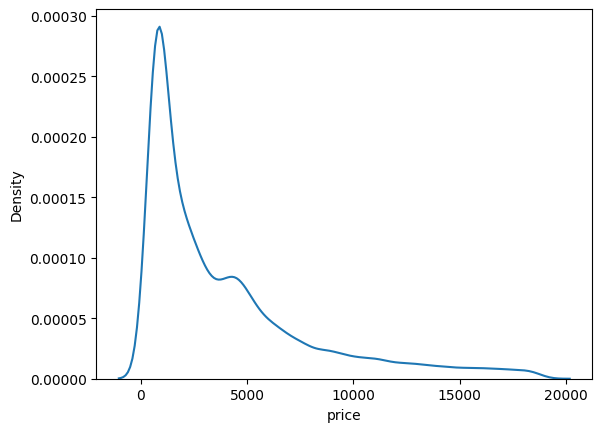

In [ ]:
sns.kdeplot(data=df["price"])

In [ ]:
# Log transforming the output
df["Price_log"] = pd.DataFrame({"price": np.log(df["price"])})
df.head()

,carat,cut,color,clarity,depth_%,table_%,price,length,width,depth,clarity_score,color_score,cut_score,Price_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,6,5,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2,5.814131


<Axes: xlabel='Price_log', ylabel='Density'>

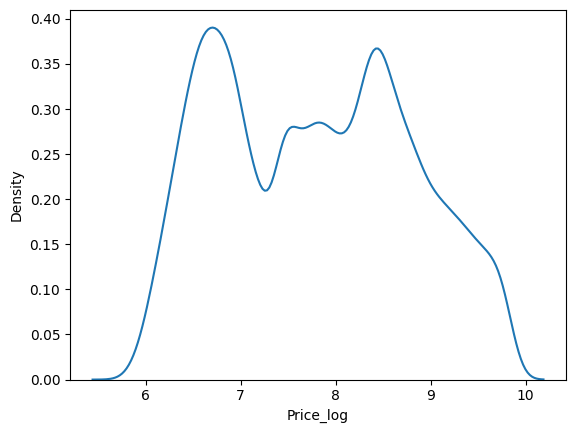

In [ ]:
sns.kdeplot(data=df["Price_log"])

In [ ]:
# Separate Input and Output Variable
Y = df["Price_log"]
X = df[["carat","depth","length","width"]]

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
columns = ["carat","depth","length","width"]

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),columns=columns,index = X_train.index)
X_test_transformed = pd.DataFrame(scaler.transform(X_test),columns=columns,index = X_test.index)

X_train_transformed.head()
X_train_transformed

,carat,depth,length,width
42836,-0.813799,-0.784375,-0.824818,-0.834724
9727,0.678822,0.779256,0.944278,0.866469
35974,-0.792777,-0.840722,-0.798148,-0.747928
22501,0.510639,0.680649,0.650910,0.588723
3571,-0.204137,-0.164557,0.099735,0.120027
...,...,...,...,...
50057,-0.204137,-0.037776,-0.149183,-0.105641
32511,-0.834822,-0.770288,-0.904827,-0.938878
5192,0.237342,0.342567,0.286423,0.232861
12172,0.804959,0.934211,0.944278,0.944585


In [ ]:
X_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10788 entries, 2714 to 43028
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   10788 non-null  float64
 1   depth   10788 non-null  float64
 2   length  10788 non-null  float64
 3   width   10788 non-null  float64
dtypes: float64(4)
memory usage: 421.4 KB


# Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

LR_model.fit(X_train_transformed,Y_train)

y_pred_LR = LR_model.predict(X_test_transformed)

In [ ]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,y_pred_LR))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,y_pred_LR))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred_LR)))

Mean Absolute Error:  0.2054118743636791
Mean Squared Error:  0.07326038293536802
Root Mean Squared Error:  0.2706665530415016


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

KNNreg = KNeighborsRegressor()
KNNreg.fit(X_train_transformed,Y_train)
y_pred_KNN = KNNreg.predict(X_test_transformed)

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,y_pred_KNN))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,y_pred_KNN))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred_KNN)))

Mean Absolute Error:  0.1961099038645691
Mean Squared Error:  0.06329044983961148
Root Mean Squared Error:  0.2515759325524035


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

DTreg = DecisionTreeRegressor()
DTreg.fit(X_train_transformed,Y_train)
y_pred_DT = DTreg.predict(X_test_transformed)


print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,y_pred_DT))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,y_pred_DT))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred_DT)))

Mean Absolute Error:  0.25011843137651324
Mean Squared Error:  0.10660339881146909
Root Mean Squared Error:  0.32650175927775504


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor()
RFreg.fit(X_train_transformed,Y_train)
y_pred_RF = RFreg.predict(X_test_transformed)

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,y_pred_RF))
print("Mean Squared Error: ",metrics.mean_squared_error(Y_test,y_pred_RF))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred_RF)))

Mean Absolute Error:  0.19924343915956483
Mean Squared Error:  0.06504351761779277
Root Mean Squared Error:  0.25503630646986863


In [ ]:
# Evaluation:

evaluation = pd.DataFrame({"Algorithms":["Linear Regression","KNN","Decision Tree","Random Forest"],"MAE":[metrics.mean_absolute_error(Y_test,y_pred_LR),metrics.mean_absolute_error(Y_test,y_pred_KNN),metrics.mean_absolute_error(Y_test,y_pred_DT),metrics.mean_absolute_error(Y_test,y_pred_RF)]})
evaluation

,Algorithms,MAE
0,Linear Regression,0.205412
1,KNN,0.196110
2,Decision Tree,0.250118
3,Random Forest,0.199243


#Assignment work:

In [ ]:
df.describe()

,carat,depth_%,table_%,price,length,width,depth,clarity_score,color_score,cut_score,Price_log
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,4.051020,4.405803,3.904097,7.786768
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.647136,1.701105,1.116600,1.014649
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.786897
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000,6.856462
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,4.000000,4.000000,7.783641
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000,8.580027
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,8.000000,7.000000,5.000000,9.842835


In [ ]:
df['price'].median()

2401.0

Figure(2000x600)


<ipython-input-34-a2c9ca930fc4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=8,center =0,ax=ax,cmap="coolwarm")


<Axes: >

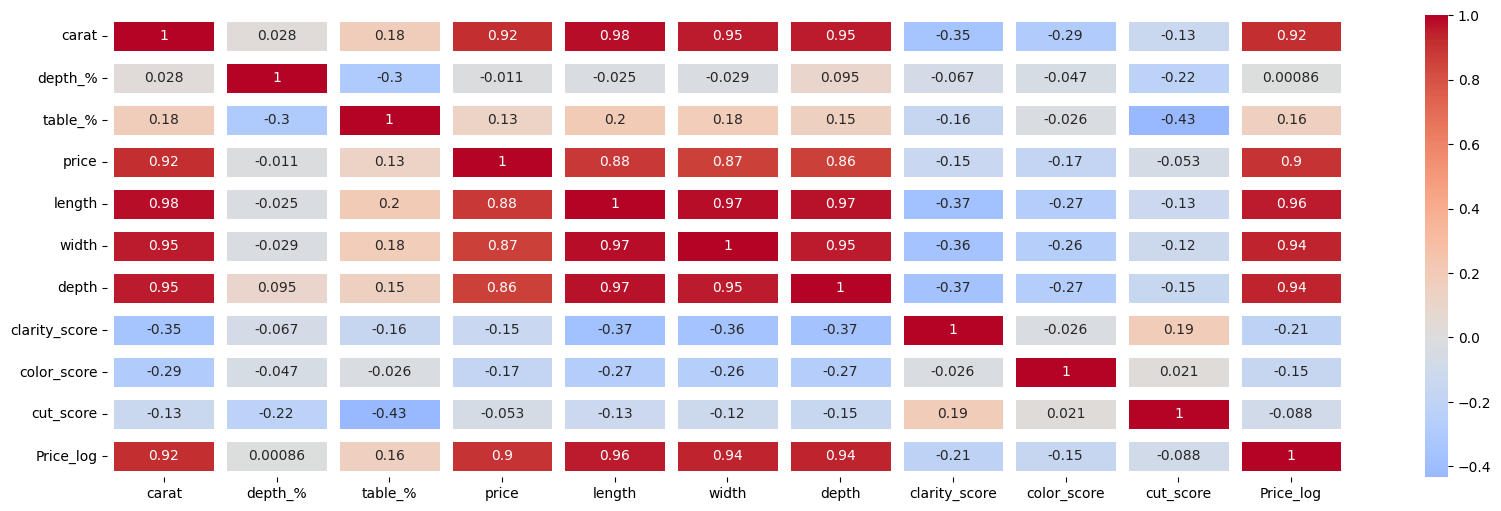

In [ ]:
f , ax = plt.subplots(figsize=(20,6))
print(f)
sns.heatmap(df.corr(),annot=True,linewidths=8,center =0,ax=ax,cmap="coolwarm")

Figure(2000x600)


<Axes: >

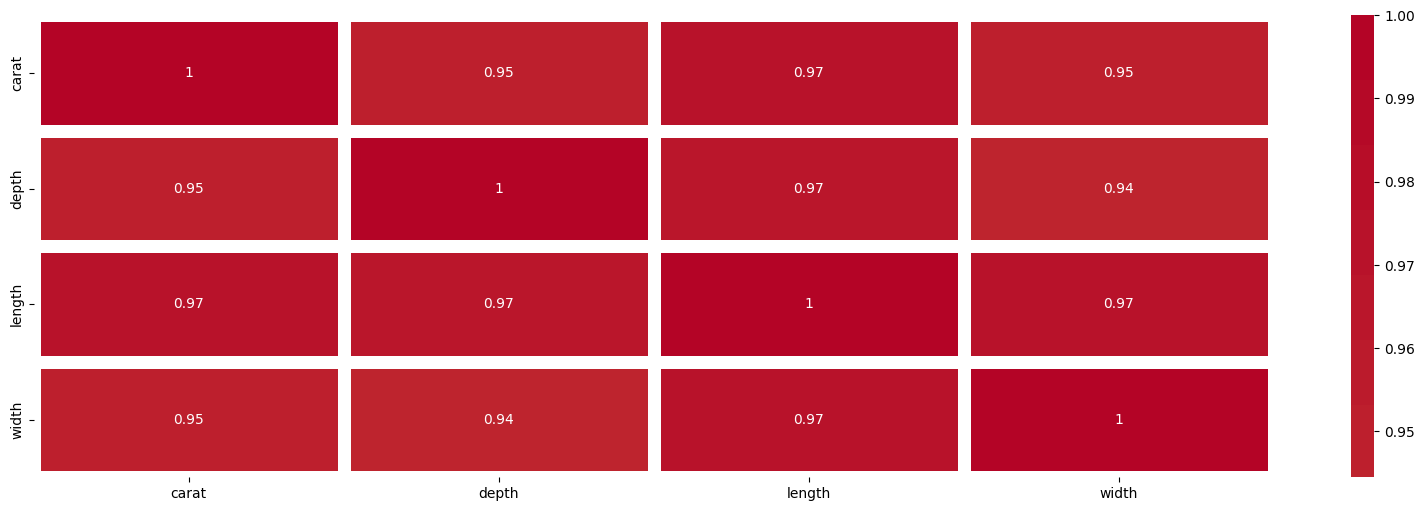

In [ ]:
f , ax = plt.subplots(figsize=(20,6))
print(f)
sns.heatmap(X_train_transformed.corr(),annot=True,linewidths=8,center =0,ax=ax,cmap="coolwarm")

In [ ]:
df.describe(include="all")

,carat,cut,color,clarity,depth_%,table_%,price,length,width,depth,clarity_score,color_score,cut_score,Price_log
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,4.051020,4.405803,3.904097,7.786768
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.647136,1.701105,1.116600,1.014649
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.786897
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000,6.856462
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,4.000000,4.000000,7.783641
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000,8.580027


In [ ]:
Y1 = df["Price_log"]
X1 = df[["carat","depth","length","width","table_%"]]
from sklearn.model_selection import train_test_split

X1_train , X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = ["carat","depth","length","width","table_%"]

X1_train_transformed = pd.DataFrame(scaler.fit_transform(X1_train),columns=columns,index = X1_train.index)
X1_test_transformed = pd.DataFrame(scaler.transform(X1_test),columns=columns,index = X1_test.index)

X1_train_transformed.head()


,carat,depth,length,width,table_%
42836,-0.813799,-0.784375,-0.824818,-0.834724,-1.991090
9727,0.678822,0.779256,0.944278,0.866469,0.689861
35974,-0.792777,-0.840722,-0.798148,-0.747928,-0.650615
22501,0.510639,0.680649,0.650910,0.588723,0.689861
3571,-0.204137,-0.164557,0.099735,0.120027,1.136686


In [ ]:
X1_train_transformed.describe(include="all")

,carat,depth,length,width,table_%
count,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04,4.315200e+04
mean,6.833408e-17,-2.133176e-16,-7.944866e-17,-1.356802e-16,2.509425e-15
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.255279e+00,-4.982232e+00,-5.091983e+00,-4.974871e+00,-6.459343e+00
25%,-8.348222e-01,-8.829824e-01,-9.048270e-01,-8.781216e-01,-6.506147e-01
50%,-2.041371e-01,-2.368948e-02,-3.361411e-02,-2.752528e-02,-2.037895e-01
75%,5.106393e-01,6.947357e-01,7.220297e-01,7.015572e-01,6.898610e-01
max,8.856705e+00,3.981369e+01,4.455799e+00,4.614770e+01,1.677557e+01
